***<span style="color:red">Logistic Regression.</span>***

Logistic regression is a statistical method used to analyze and model the relationship between a binary dependent variable (also known as the outcome or response variable) and one or more independent variables (also known as predictors or covariates). The goal of logistic regression is to determine the probability of an event occurring based on the values of the independent variables.

***<span style="color:purple">Problem Statement</span>***

<p>1 - Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work</p>
<p>2 - Plot bar charts showing impact of employee salaries on retention</p>
<p>3 - Plot bar charts showing corelation between department and employee retention</p>
<p>4 - Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model<p>

In [38]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv("HR_comma_sep.csv")
df.sample(frac=0.001)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
8168,0.80,0.82,3,218,3,0,0,0,sales,low
14080,0.53,0.77,2,167,2,0,0,0,support,medium
10581,0.75,0.94,5,217,2,0,0,0,support,medium
4038,0.79,0.73,5,155,3,0,0,0,IT,medium
4673,0.98,0.88,5,203,5,1,0,0,sales,medium
9307,0.68,0.44,5,165,3,0,0,0,RandD,medium
584,0.41,0.56,2,154,3,0,1,1,support,medium
8747,0.71,1.00,3,181,4,0,0,0,technical,medium
14567,0.41,0.55,2,154,3,0,1,0,support,low
2873,0.77,0.93,5,182,4,0,0,0,support,medium


**<span style="color:purple">Exploratory Data Analysis</span>**

*Below Two chart ylabel have categorical values so we use bar chart to see the impact of department and salary on employee retention*

Text(0.5, 1.0, 'Impact of salary on employee retention')

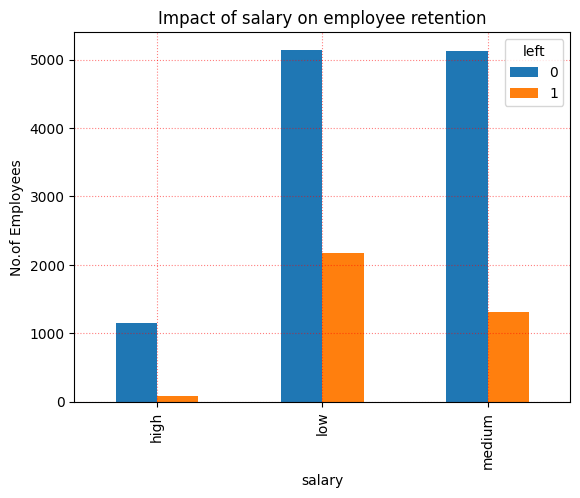

In [40]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.grid(color='red', linestyle=':', alpha=0.5)
plt.ylabel("No.of Employees")
plt.title("Impact of salary on employee retention")

Text(0.5, 1.0, 'Departemnt and employee retention correlation')

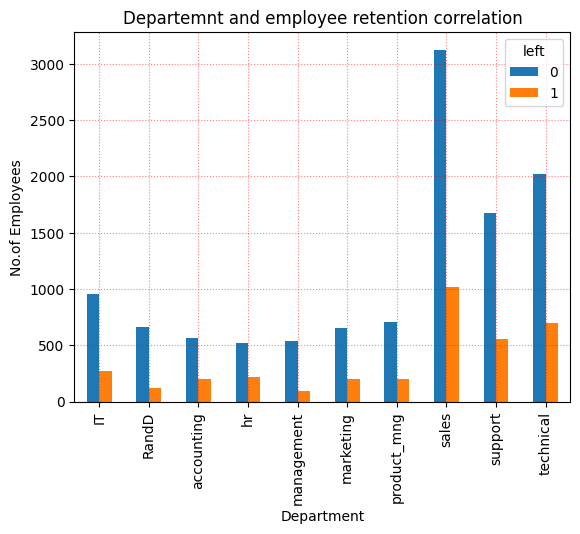

In [41]:
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.grid(color='red', linestyle=':', alpha=0.5)
plt.ylabel("No.of Employees")
plt.title("Departemnt and employee retention correlation")

**below two lines show how many employee left and stay**

In [42]:
left=df[df.left==1]
left.shape

(3571, 10)

In [43]:
stay=df[df.left==0]
stay.shape

(11428, 10)

**Now this is important to understand. As we are analyzing about the retention of employee which is 0 mean left and 1 mean not left
in column=left. Now by using below code we determine the mean of each column having numeric values. By this we come to know the
difference of reasons of leaving and staying of employee**

In [44]:
df.groupby('left').mean()

C:\Users\Nasir\AppData\Local\Temp\ipykernel_13268\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**<span style="color:orange">From the data analysis so far we can conclude that we will use following variables as 
independant variables in our model</span>**
<ol>
<li>Satisfaction Level</li>
<li>Average Monthly Hours</li>
<li>Promotion Last 5 Years</li>
<li>Salary</li>
</ol>

**Data Preprocessing**

In [45]:
HR = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
HR.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [46]:
dumy=pd.get_dummies(HR.salary,prefix="salary")

In [47]:
HR=pd.concat([HR,dumy],axis=1)
HR.drop(['salary'],axis="columns",inplace=True)
HR.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [48]:
x=HR
y=df.left

**<span style="color:purple">Train_test_split</span>**

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [50]:
x_test.shape

(4500, 6)

***<span style="color:purple">Now Using Logistic Regression</span>***

In [51]:
from sklearn.linear_model import LogisticRegression
loreg=LogisticRegression()
loreg.fit(x_train,y_train)

LogisticRegression()

In [52]:
loreg.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
loreg.predict_proba(x_test)

array([[0.88719877, 0.11280123],
       [0.87868373, 0.12131627],
       [0.75080321, 0.24919679],
       ...,
       [0.87783682, 0.12216318],
       [0.90477832, 0.09522168],
       [0.77601552, 0.22398448]])

In [65]:
loreg.score(x_test,y_test)

0.7808888888888889